In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('../data_cleaning/04/clean_data04.csv', index_col='Unnamed: 0',
                   na_values=['Brak', 'Brakopinii', None])
data.head()

,nazwa,miasto,firma,czas_gry,kategoria,poziom_trudnosci,liczba_ocen,miejsce_w_polsce,języki_rosyjski,bezpieczeństwo_tylko_niskie_napięcie_w_zasięgu_gracza,...,podstawowe_nie_dla_kobiet_w_ciąży,języki_polski,podstawowe_przyjazny_dzieciom,podstawowe_od_16_lat,srednia_ocena,ocena_obsluga,ocena_klimat,trudnosc_wg_graczy,min_liczba_graczy,max_liczba_graczy
0,Cicha Noc,Gliwice,TickTack,75,Przygodowy,śr. zaawansowani,85,1,0,1,...,1,1,1,0,10.0,10.0,10.0,Średni,2,5
1,Powstanie Warszawskie,Warszawa,Black Cat Escape Room,80,Historyczny,śr. zaawansowani,258,2,0,1,...,1,1,1,0,9.8,9.8,10.0,Trudny,2,8
2,Lokalizacja,Gliwice,TickTack,75,Fabularny,doświadczony,271,3,0,1,...,1,1,0,1,10.0,10.0,10.0,Trudny,2,5
3,Opuszczony Hotel,Wrocław,Exit19.pl,101,Thriller,śr. zaawansowani,57,4,0,1,...,1,1,0,1,9.9,9.9,10.0,Średni,2,5
4,Rastamobil,Wrocław,Escape Bus / Escapeo,90,Przygodowy,śr. zaawansowani,98,5,0,1,...,0,1,0,0,9.9,10.0,10.0,Średni,2,4


In [3]:
data[data.isna().any(axis=1)]

,nazwa,miasto,firma,czas_gry,kategoria,poziom_trudnosci,liczba_ocen,miejsce_w_polsce,języki_rosyjski,bezpieczeństwo_tylko_niskie_napięcie_w_zasięgu_gracza,...,podstawowe_nie_dla_kobiet_w_ciąży,języki_polski,podstawowe_przyjazny_dzieciom,podstawowe_od_16_lat,srednia_ocena,ocena_obsluga,ocena_klimat,trudnosc_wg_graczy,min_liczba_graczy,max_liczba_graczy
460,Awaria zasilania w Parku Jurajskim,Kraków,Anikino Kraina Zabaw Dziecięcych,60,Dla dzieci,początkujący,Brak,461,0,0,...,0,1,1,0,NaN,NaN,NaN,NaN,4,10
461,Zdobyć plany Gwiazdy Śmierci,Kraków,Anikino Kraina Zabaw Dziecięcych,60,Dla dzieci,początkujący,Brak,461,0,0,...,0,1,1,0,NaN,NaN,NaN,NaN,4,10
462,Sala tortur Zygfryda de Löwe,Gierłoż,Mazurolandia,60,Historyczny,doświadczony,Brak,461,0,0,...,0,1,0,0,NaN,NaN,NaN,NaN,2,7
463,Tajemnica Jumanji,Kraków,Anikino Kraina Zabaw Dziecięcych,60,Dla dzieci,na pierwszy raz,Brak,461,0,1,...,0,1,1,0,NaN,NaN,NaN,NaN,4,10
464,"Dawno, dawno temu",Kraków,Anikino Kraina Zabaw Dziecięcych,60,Dla dzieci,początkujący,Brak,461,0,0,...,0,1,1,0,NaN,NaN,NaN,NaN,6,10
465,Warsaw puzzle tour,Warszawa,Escape Service,60,Przygodowy,śr. zaawansowani,Brak,461,0,1,...,0,1,0,0,NaN,NaN,NaN,NaN,8,30
466,Piramida,Dębki,Locked Houses,60,Przygodowy,śr. zaawansowani,Brak,461,0,0,...,1,1,1,0,NaN,NaN,NaN,NaN,2,4
467,Zbrodnia,Mrągowo,Quady Mrągowo,60,Kryminalny,śr. zaawansowani,Brak,461,0,0,...,0,1,0,0,NaN,NaN,NaN,NaN,2,6
468,Podróże przez sny,Mrągowo,Quady Mrągowo,60,Przygodowy,doświadczony,Brak,461,0,0,...,0,1,0,0,NaN,NaN,NaN,NaN,2,4
469,Laboratorium,Mrągowo,Quady Mrągowo,80,Dla dzieci,początkujący,Brak,461,0,0,...,0,1,1,0,NaN,NaN,NaN,NaN,2,6


Braki danych dotyczą 14 wierszy (z 476 pobranych przez web scraping), dla tych escape roomów użytkownicy nie wystawili żadnych recenzji. Wcześniej podczas czyszczenia odrzucono już 3 wiersze. Razem usunięto zatem 17 wierszy, czyli ok. 3.5% zbioru.

In [4]:
data = data[data.isna().any(axis=1) == False]
data = data.reset_index(drop=True)
data.shape

(459, 49)

Do dalszej analizy pozostało 459 obserwacji.
Następnym krokiem będzie przyjrzenie się zmiennym zawierającym tekst.

In [5]:
zmienne_tekst = ['nazwa', 'miasto', 'firma', 'kategoria', 'poziom_trudnosci', 'trudnosc_wg_graczy']
for x in zmienne_tekst:
    print(data[x].value_counts())

Saloon                                3
Łódź Podwodna                         3
Kraina Czarów                         3
Chata Wiedźmy                         3
W cieniu piramid                      2
                                     ..
Pokój hotelowy - miejsce zabójstwa    1
Wybudzenie                            1
Szaman                                1
5 Morderstw                           1
Łóżko szpitalne                       1
Name: nazwa, Length: 439, dtype: int64
Warszawa               54
Poznań                 50
Wrocław                49
Kraków                 37
Bydgoszcz              22
Gdańsk                 21
Łódź                   20
Katowice               16
Bielsko-Biała          12
Toruń                  10
Nowy Sącz              10
Gdynia                  9
Chorzów                 8
Olsztyn                 8
Białystok               8
Rzeszów                 7
Szczecin                6
Gliwice                 6
Rybnik                  6
Gorzów Wielkopolski     6
L

W kilku przypadkach mamy powtarzające się nazwy - bardzo rzadko jest to ten sam pokój przeniesiony do innego miasta, raczej świadczy to o popularności danej tematyki / klimatu.
Escape roomy znajdują się głównie w większych miastach - warto byłoby zwizualizować to na mapie Polski (bąble w danych miastach - wielkość odpowiada liczbie escape roomów).
Warto też bliżej przyjrzeć się nazwom firm - czy możliwe że istnieje kilka różnych firm o tej samej nazwie, czy może tak jak w przypadku Wyjścia Awaryjnego mają oddziały w różnych miastach i stąd takie liczności?
Kategorie i poziom trudności - prawdopodobnie najlepiej będzie pokazać na wykresach słupkowych.
Do sprawdzenia - czy poziom trudności zgadza się z poziomem trudności ocenionym przez graczy? Czy może jest tu jakaś zależność warta uwagi?

Następnym krokiem jest szybki raport pandas profiling - jest to najszybszy sposób na sprawdzenie rozkładów przy tak dużej liczbie zmiennych i wyłapanie nietypowych, wartych uwagi wartości. Może się też okazać, że część atrybutów pojawia się tylko w przypadku pojedynczych pokoi i można pominąć je w dalszej analizie

In [6]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data, minimal=True)
prof.to_file(output_file='profiling_minimal01.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

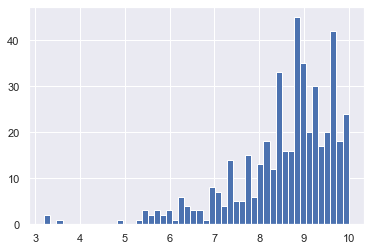

In [7]:
data['srednia_ocena'].hist(bins=50)

Z dalszej analizy można wykluczyć zmienne dla których >95% może nawet >90% to zera - zwykle są to pojedyncze przypadki - np. jeden escape rooom online z prawdziwym mistzem gry (jest to jednocześnie jednyny przypadek gdzie języki_polski == 0 co wynika z przesunięcia sekcji z językiem na rzecz tej z informacją o prawdziwym mistrzu gry), 3 escape roomy dostępne w języku słowackim, wszystkie w tej samej miejscowości obok granicy ze Słowacją.
Dodatkowo zmienne takie jak nazwa czy miejsce w Polsce też prawdopodobnie nie będą ważne podczas analizy ale zostaną zachowane do ew. wizualizacji, itp.

In [8]:
do_odrzucenia_95 = ['języki_rosyjski', 'podstawowe_bardzo_wąskie_przejścia', 'bezpieczeństwo_dezynfekcja_lampami_uvc', 'podstawowe_pokój_eliminacyjny_poland_escape', 'inne_prawdziwy_mistrz_gry', 'języki_słowacki', 'języki_czeski', 'podstawowe_nie_dla_osób_z_chorobami_serca', 'podstawowe_od_18_lat']
do_odrzucenia_90 = do_odrzucenia_95 + ['podstawowe_możesz_kupić_tutaj_escape_tales', 'podstawowe_półmrok_w_pokoju', 'podstawowe_gra_bez_aktora', 'podstawowe_przyjazny_niepełnosprawnym']
print(len(do_odrzucenia_95), len(do_odrzucenia_90))

9 13


In [9]:
data95 = data.drop(columns=do_odrzucenia_95)
print(data95.shape)
data90 = data.drop(columns=do_odrzucenia_90)
print(data90.shape)

(459, 40)
(459, 36)


In [10]:
from pandas_profiling import ProfileReport
# prof = ProfileReport(data95, minimal=True)
# prof.to_file(output_file='profiling_minimal02_95.html')
prof = ProfileReport(data90)
prof.to_file(output_file='profiling_minimal02_90.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data90.to_csv('data_clean.csv')